In [1]:
#載入套件
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import datetime
from pandas_profiling import ProfileReport

In [4]:
pd.set_option("display.max_rows", 1000)    #設定最大能顯示1000rows
pd.set_option("display.max_columns", 1000) #設定最大能顯示1000columns

In [5]:
#在資料夾裡面放入微軟正黑體 讓視覺化結果可以顯示中文
import matplotlib.font_manager as mfm
font_path = "./simhei.ttf"
prop = mfm.FontProperties(fname = font_path)

In [192]:
data=pd.read_csv('/Users/terrylu/Desktop/呂紀廷/台灣大學/大三下/商管程設/PBC 108-2_hw8/submission_complete.csv')

In [194]:
data.head(10)

,submission_id,status,user,challenge,problem,score,time,memory,code_length,submit_time
0,295471,Accepted,81dd7b31,PBC 108-2 HW0,HW0 (1) 防疫規定,20,496,29954048,136,2020-03-02 21:21:20
1,295472,Wrong Answer,16c8992f,PBC 108-2 HW0,HW0 (1) 防疫規定,0,501,29958144,151,2020-03-02 21:25:42
2,295473,Wrong Answer,16c8992f,PBC 108-2 HW0,HW0 (1) 防疫規定,0,517,29958144,151,2020-03-02 21:27:22
3,295475,Accepted,ff0d1df6,PBC 108-2 HW0,HW0 (1) 防疫規定,20,539,29954048,167,2020-03-02 21:32:31
4,295478,Wrong Answer,4c72e3cf,PBC 108-2 HW0,HW0 (1) 防疫規定,0,511,29954048,154,2020-03-02 21:39:39
5,295479,Runtime error,4c72e3cf,PBC 108-2 HW0,HW0 (1) 防疫規定,0,1840,75177984,166,2020-03-02 21:41:11
6,295480,Runtime error,4c72e3cf,PBC 108-2 HW0,HW0 (1) 防疫規定,0,2049,75182080,163,2020-03-02 21:43:58
7,295481,Wrong Answer,941f0aa4,PBC 108-2 HW0,HW0 (1) 防疫規定,0,520,29966336,38,2020-03-02 21:45:49
8,295482,Wrong Answer,16c8992f,PBC 108-2 HW0,HW0 (1) 防疫規定,0,493,29958144,201,2020-03-02 21:45:53
9,295485,Runtime error,4c72e3cf,PBC 108-2 HW0,HW0 (1) 防疫規定,0,2004,75177984,179,2020-03-02 21:48:41


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24624 entries, 0 to 24623
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   submission_id  24624 non-null  int64 
 1   status         24624 non-null  object
 2   user           24624 non-null  object
 3   challenge      24624 non-null  object
 4   problem        24624 non-null  object
 5   score          24624 non-null  int64 
 6   time           24624 non-null  int64 
 7   memory         24624 non-null  int64 
 8   code_length    24624 non-null  int64 
 9   submit_time    24624 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.9+ MB


In [9]:
data.describe()

,submission_id,score,time,memory,code_length
count,24624.000000,24624.000000,24624.000000,2.462400e+04,24624.000000
mean,315251.381985,16.143681,1523.388158,4.164858e+07,1965.594420
std,11215.049418,11.680429,2403.658429,4.776283e+07,2039.621591
min,295471.000000,0.000000,0.000000,0.000000e+00,2.000000
25%,305229.750000,6.000000,579.000000,2.995814e+07,617.000000
50%,314817.500000,18.000000,835.000000,3.022029e+07,1224.000000
75%,325513.250000,24.000000,1418.250000,3.348480e+07,2585.000000
max,333150.000000,60.000000,33000.000000,5.629915e+09,23098.000000


In [10]:
data['submit_time_date']=data['submit_time'].apply(lambda x : x[:10])

In [11]:
data['submit_time_date'] =  pd.to_datetime(data['submit_time_date'], format='%Y-%m-%d')

In [12]:
data['submit_time'] =  pd.to_datetime(data['submit_time'], format='%Y-%m-%d %H:%M:%S')

In [13]:
#profile = ProfileReport(data, title='Pandas Profiling Report', html={'style':{'full_width':True}})

In [14]:
#profile.to_notebook_iframe()

In [15]:
#profile.to_widgets()

In [16]:
data['challenge'].unique()

array(['PBC 108-2 HW0', 'PBC 108-2 HW1', 'PBC 108-2 HW2', 'PBC 108-2 HW3',
       'PBC 108-2 Quiz', 'PBC 108-2 HW4', 'PBC 108-2 Midterm1',
       'PBC 108-2 HW5', 'PBC 108-2 HW6', 'PBC 108-2 HW7'], dtype=object)

In [17]:
data['problem'].unique()

array(['HW0 (1) 防疫規定', 'HW1 (1) 防疫規定 (續)', 'HW1 (2) 進階防疫規定',
       'HW1 (3) 被感染機率', 'HW2(1) 感染機率決策樹', 'HW2(2) 進階防疫規定-2',
       'HW2(3) 進階防疫規定-3', 'HW2(4) 大雄的委託', 'HW3 (1) 估算進貨時間',
       'HW3 (2) 大雄的委託-2', 'HW3 (3) 消防局最佳選址問題', 'Quiz(1) 整數和',
       'Quiz(2) 估算進貨時間-2', 'HW4 (1) 第 K 大', 'HW4 (2) 消防局最佳選址問題-2',
       'HW4 (3) 大雄的委託-3', 'Midterm1 (1) 整數和', 'Midterm1 (2) 閉區間',
       'Midterm1 (3) 距離矩陣', 'Midterm1 (4) 最佳商人', 'HW5 (1) 判斷兩整數串是否相符',
       'HW5 (2) 消防局最佳選址問題-3', 'HW5 (3) 大雄的委託-4', 'HW6 (1) 到底是褒還是貶',
       'HW6 (2) 句子長短也能判斷性別？', 'HW6 (3) 大雄的委託-5', '交易紀錄查詢 (1)',
       '交易紀錄查詢 (2)', '給大雄的禮物'], dtype=object)

In [18]:
len(data['problem'].unique())

29

In [19]:
user_list=list(data['user'].unique())

In [20]:
len(user_list)

196

In [21]:
#Q1 是否原本班上同學實力相差就很多 跟作業無關   分群班上同學

In [22]:
data['status_value']=data['status'].apply(lambda x : 1 if x=='Accepted' else 0)

In [23]:
a=data.groupby(['user'])['status'].count()

In [24]:
b=data.groupby(['user'])['status_value'].sum()

In [25]:
bb=data.groupby(['user'])['score'].sum()

In [26]:
bbb=data.groupby(['user'])['code_length'].mean()

In [27]:
c=b/a

In [28]:
d=pd.DataFrame({'total_count':a,"ac_count":b,"ac_rate":c,'score':bb,"code_length":bbb})

In [195]:
e=d.sort_values(by=['ac_count',"ac_rate"],ascending=False)
e.head(50)

,total_count,ac_count,ac_rate,score,code_length
user,,,,,
f5b7047e,198,103,0.520202,4966,4367.257576
074b598d,256,77,0.300781,3426,1459.988281
26effc0c,146,71,0.486301,2904,2025.897260
f27056d3,188,71,0.377660,3390,2281.569149
89fc84da,159,69,0.433962,2982,3058.987421
307f62a0,187,69,0.368984,3192,3283.486631
ccb6f08d,129,68,0.527132,2720,2495.937984
3054de89,158,68,0.430380,3112,2541.189873
28ff1dca,129,66,0.511628,2632,2668.255814


In [64]:
f=e.head(20)

In [191]:
f

,total_count,ac_count,ac_rate,score,code_length
user,,,,,
f5b7047e,198,103,0.520202,4966,4367.257576
074b598d,256,77,0.300781,3426,1459.988281
26effc0c,146,71,0.486301,2904,2025.897260
f27056d3,188,71,0.377660,3390,2281.569149
89fc84da,159,69,0.433962,2982,3058.987421
307f62a0,187,69,0.368984,3192,3283.486631
ccb6f08d,129,68,0.527132,2720,2495.937984
3054de89,158,68,0.430380,3112,2541.189873
28ff1dca,129,66,0.511628,2632,2668.255814


In [62]:
g=e.tail(20)

In [63]:
g

,total_count,ac_count,ac_rate,score,code_length
user,,,,,
8744e99d,50,18,0.360000,842,587.280000
2db75887,76,18,0.236842,1174,1343.473684
c60d1bb1,87,18,0.206897,764,602.195402
cfb503bf,87,18,0.206897,916,1114.563218
0c523773,183,18,0.098361,1488,1096.896175
5086c138,30,17,0.566667,542,658.900000
a6c0a859,42,17,0.404762,722,1143.952381
c49e0192,67,17,0.253731,986,1403.074627
6ee881ad,50,16,0.320000,562,484.440000


In [142]:
ff=[f['ac_count'].mean(),f['ac_rate'].mean()*100]

In [143]:
gg=[g['ac_count'].mean(),g['ac_rate'].mean()*100]

In [144]:
ff
gg

[66.35, 44.59258321916024]

[13.05, 28.398473215229796]

<Figure size 3600x3000 with 0 Axes>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

Text(0.5, 0, 'level')

Text(0, 0.5, 'AC total quantities')

Text(0.5, 1.0, 'Compare AC total quantities in different levels')

<Figure size 3600x3000 with 0 Axes>

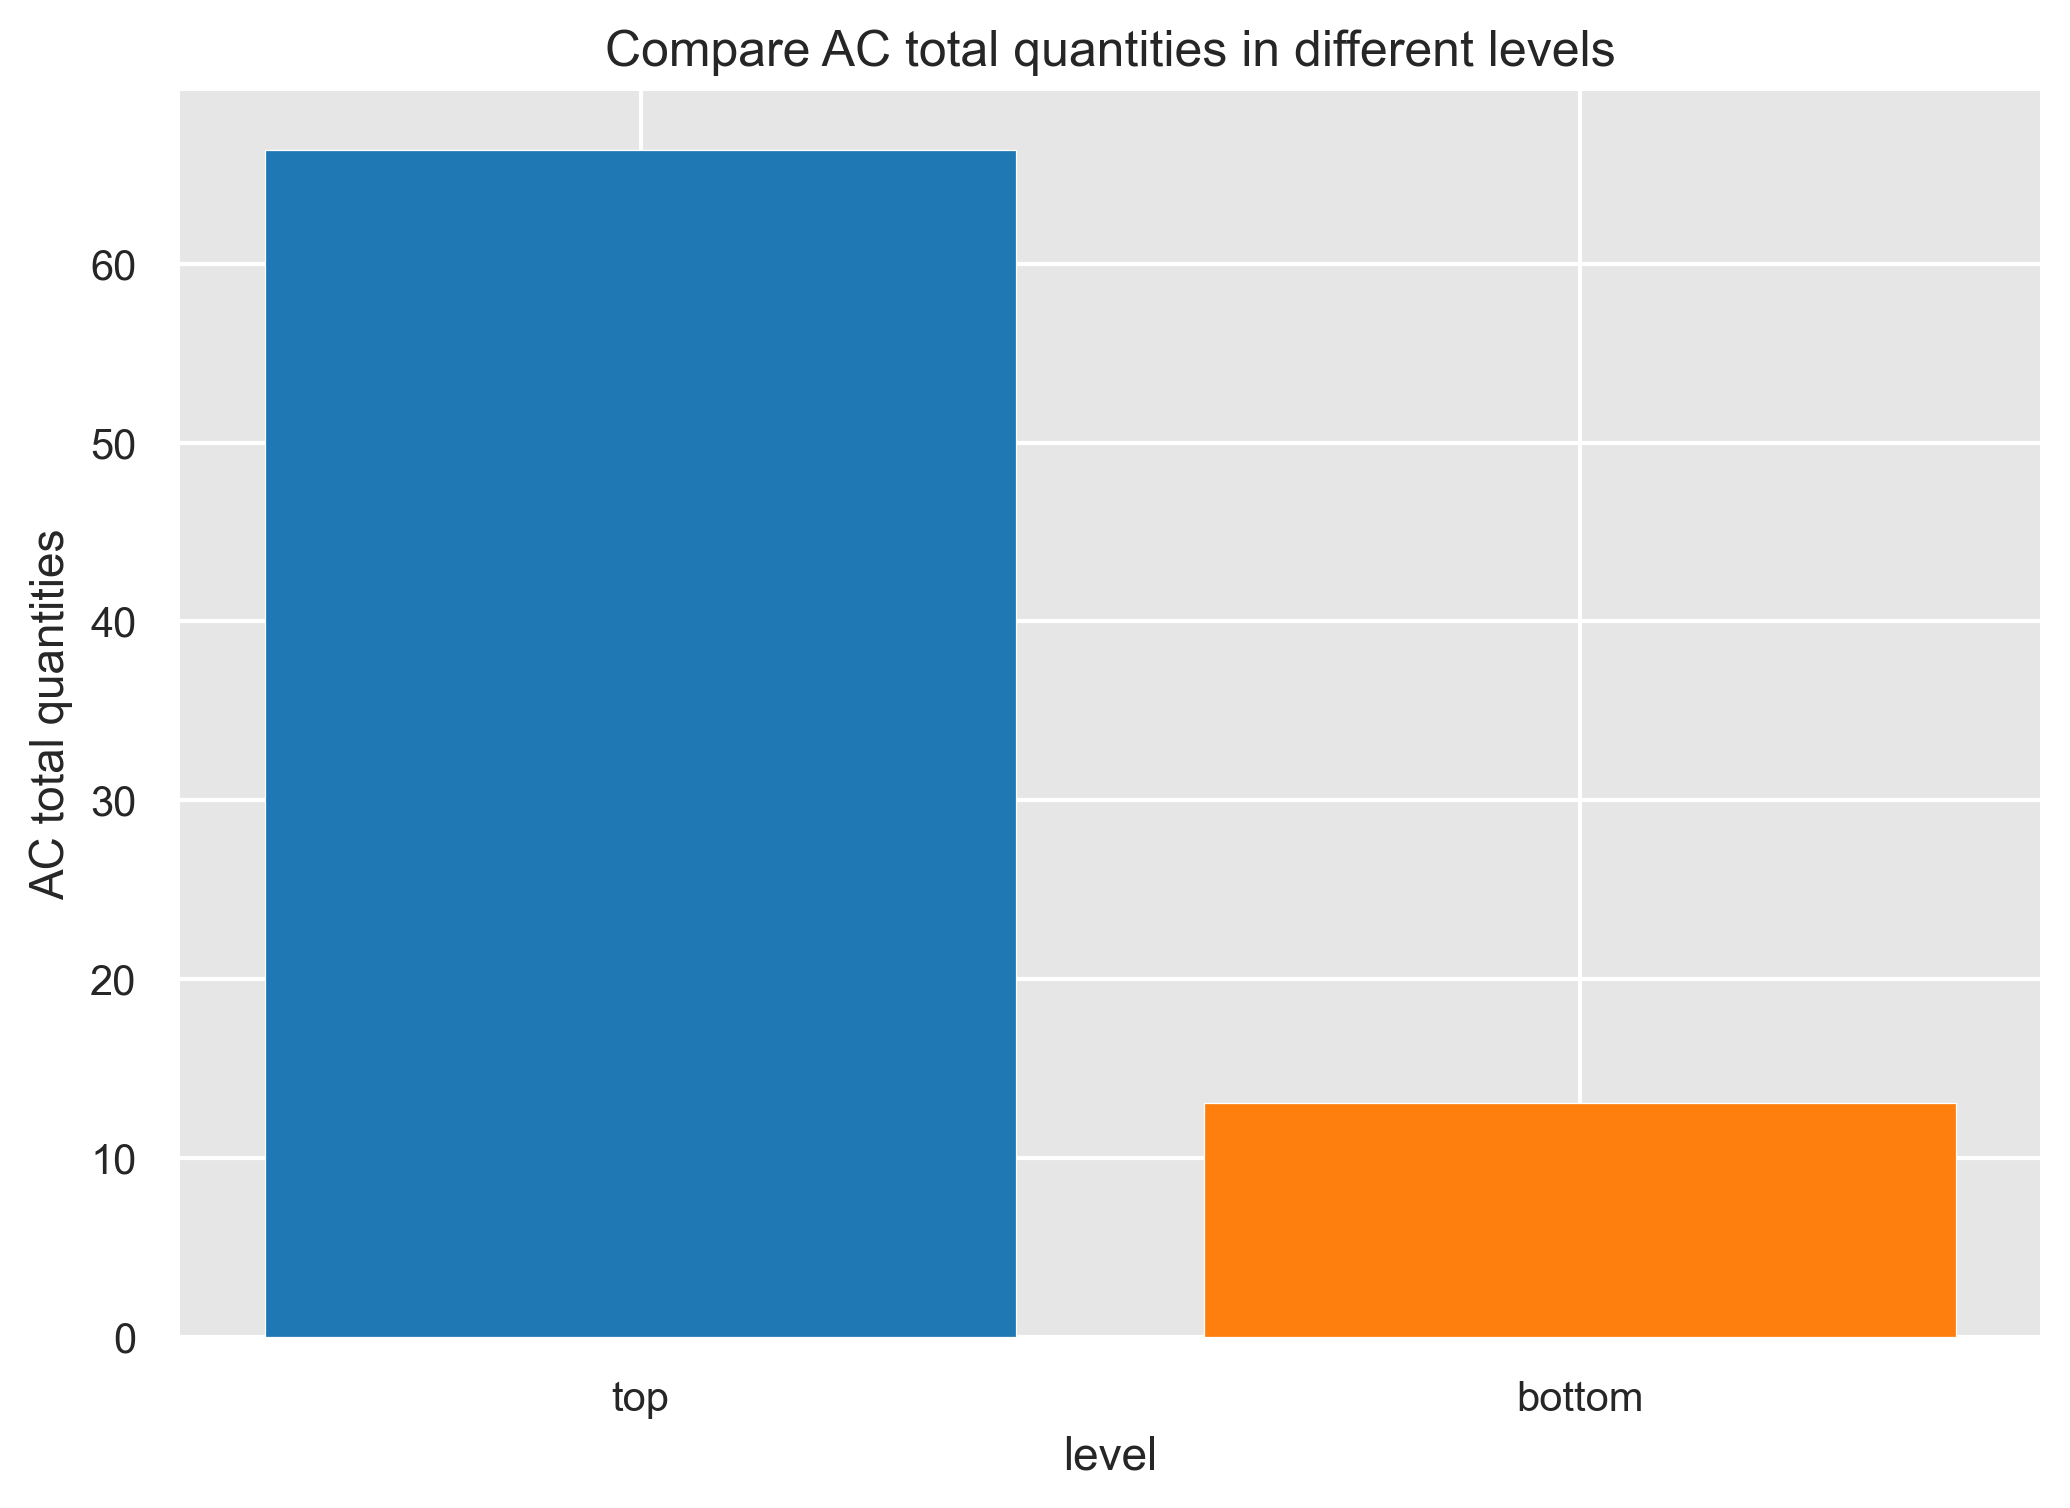

In [186]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(12,10))
fig, ax = plt.subplots()
ax.bar("top",ff[0])
ax.bar("bottom",gg[0])
plt.xlabel('level')
plt.ylabel("AC total quantities")
plt.title('Compare AC total quantities in different levels')
plt.rcParams['savefig.dpi'] = 300 
plt.rcParams['figure.dpi'] = 300 
#plt.savefig('3.png',dpi=900,bbox_inches='tight')  #存檔
plt.show()

<Figure size 3600x3000 with 0 Axes>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

Text(0.5, 0, 'level')

Text(0, 0.5, 'AC rate in percentage')

Text(0.5, 1.0, 'Compare AC rate in different levels')

<Figure size 3600x3000 with 0 Axes>

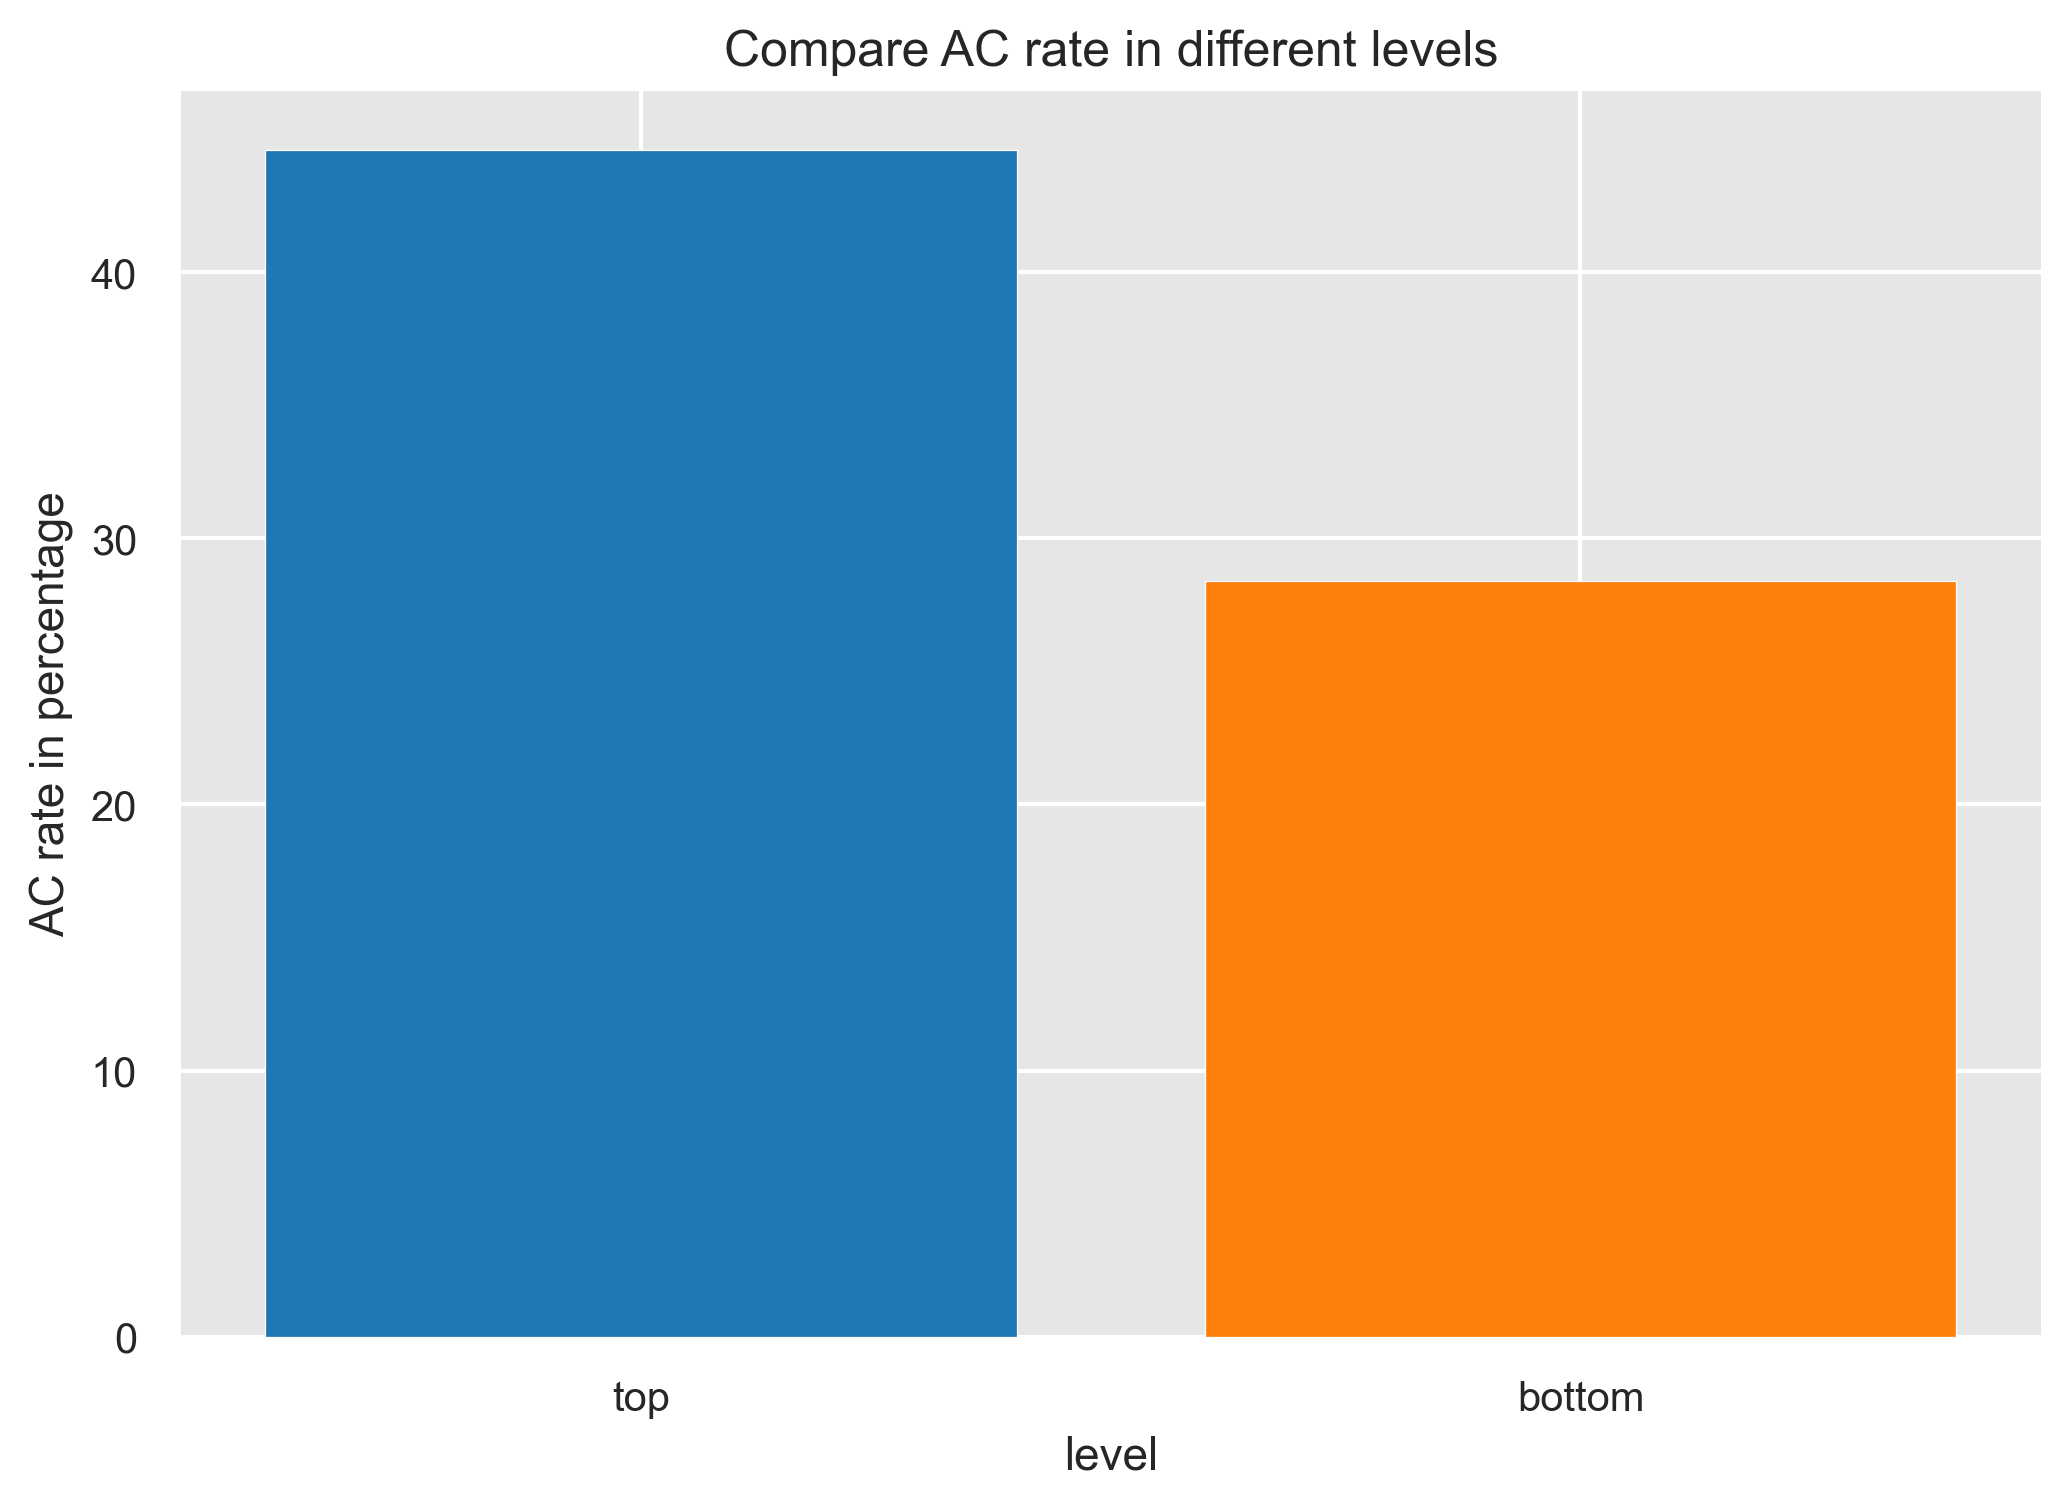

In [187]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(12,10))
fig, ax = plt.subplots()
ax.bar("top",ff[1])
ax.bar("bottom",gg[1])
plt.xlabel('level')
plt.ylabel("AC rate in percentage")
plt.title('Compare AC rate in different levels')
plt.rcParams['savefig.dpi'] = 300 
plt.rcParams['figure.dpi'] = 300 
#plt.savefig('4.png',dpi=900,bbox_inches='tight')  #存檔
plt.show()

In [31]:
#Q2 找出最難的作業 用分數以及繳交次數去看 是否出太難影響寫作業意願  （考慮分群  以及困難度是否符合他的分數）

In [32]:
aaaa=data.groupby(['problem'])['score'].mean()

In [33]:
bbbb=data.groupby(['problem'])['status_value'].mean()

In [34]:
cccc=data.groupby(['problem'])['status_value'].count()

In [35]:
ddd=pd.DataFrame({'score':aaaa,"ac rate":bbbb,"total handin count":cccc})

In [177]:
eee=ddd.sort_values(by=["ac rate"],ascending=False)
eee

,score,ac rate,total handin count
problem,,,
Quiz(1) 整數和,55.135593,0.885593,236
Midterm1 (2) 閉區間,26.772727,0.875000,264
HW1 (2) 進階防疫規定,17.304136,0.854015,411
Midterm1 (1) 整數和,17.754789,0.827586,261
Midterm1 (3) 距離矩陣,24.093190,0.784946,279
HW4 (1) 第 K 大,13.966292,0.679775,356
HW2(1) 感染機率決策樹,15.333333,0.643478,345
HW1 (1) 防疫規定 (續),13.804167,0.633333,480
HW3 (1) 估算進貨時間,12.482639,0.491319,576


<Figure size 2400x1800 with 0 Axes>

Text(0.5, 0, 'ac rate')

Text(0, 0.5, 'Problems')

Text(0.5, 1.0, 'ac rate of different problems')

[Text(0, 0, 'Quiz(1) 整數和'),
 Text(0, 0, 'Midterm1 (2) 閉區間'),
 Text(0, 0, 'HW1 (2) 進階防疫規定'),
 Text(0, 0, 'Midterm1 (1) 整數和'),
 Text(0, 0, 'Midterm1 (3) 距離矩陣'),
 Text(0, 0, 'HW4 (1) 第 K 大'),
 Text(0, 0, 'HW2(1) 感染機率決策樹'),
 Text(0, 0, 'HW1 (1) 防疫規定 (續)'),
 Text(0, 0, 'HW3 (1) 估算進貨時間'),
 Text(0, 0, 'HW3 (3) 消防局最佳選址問題'),
 Text(0, 0, 'HW5 (2) 消防局最佳選址問題-3'),
 Text(0, 0, 'HW5 (1) 判斷兩整數串是否相符'),
 Text(0, 0, 'HW2(3) 進階防疫規定-3'),
 Text(0, 0, 'HW3 (2) 大雄的委託-2'),
 Text(0, 0, 'HW1 (3) 被感染機率'),
 Text(0, 0, 'Quiz(2) 估算進貨時間-2'),
 Text(0, 0, 'HW0 (1) 防疫規定'),
 Text(0, 0, 'Midterm1 (4) 最佳商人'),
 Text(0, 0, '交易紀錄查詢 (2)'),
 Text(0, 0, 'HW2(4) 大雄的委託'),
 Text(0, 0, 'HW4 (3) 大雄的委託-3'),
 Text(0, 0, 'HW6 (1) 到底是褒還是貶'),
 Text(0, 0, 'HW5 (3) 大雄的委託-4'),
 Text(0, 0, 'HW2(2) 進階防疫規定-2'),
 Text(0, 0, '交易紀錄查詢 (1)'),
 Text(0, 0, 'HW6 (3) 大雄的委託-5'),
 Text(0, 0, 'HW4 (2) 消防局最佳選址問題-2'),
 Text(0, 0, 'HW6 (2) 句子長短也能判斷性別？'),
 Text(0, 0, '給大雄的禮物')]

<Figure size 2400x1800 with 0 Axes>

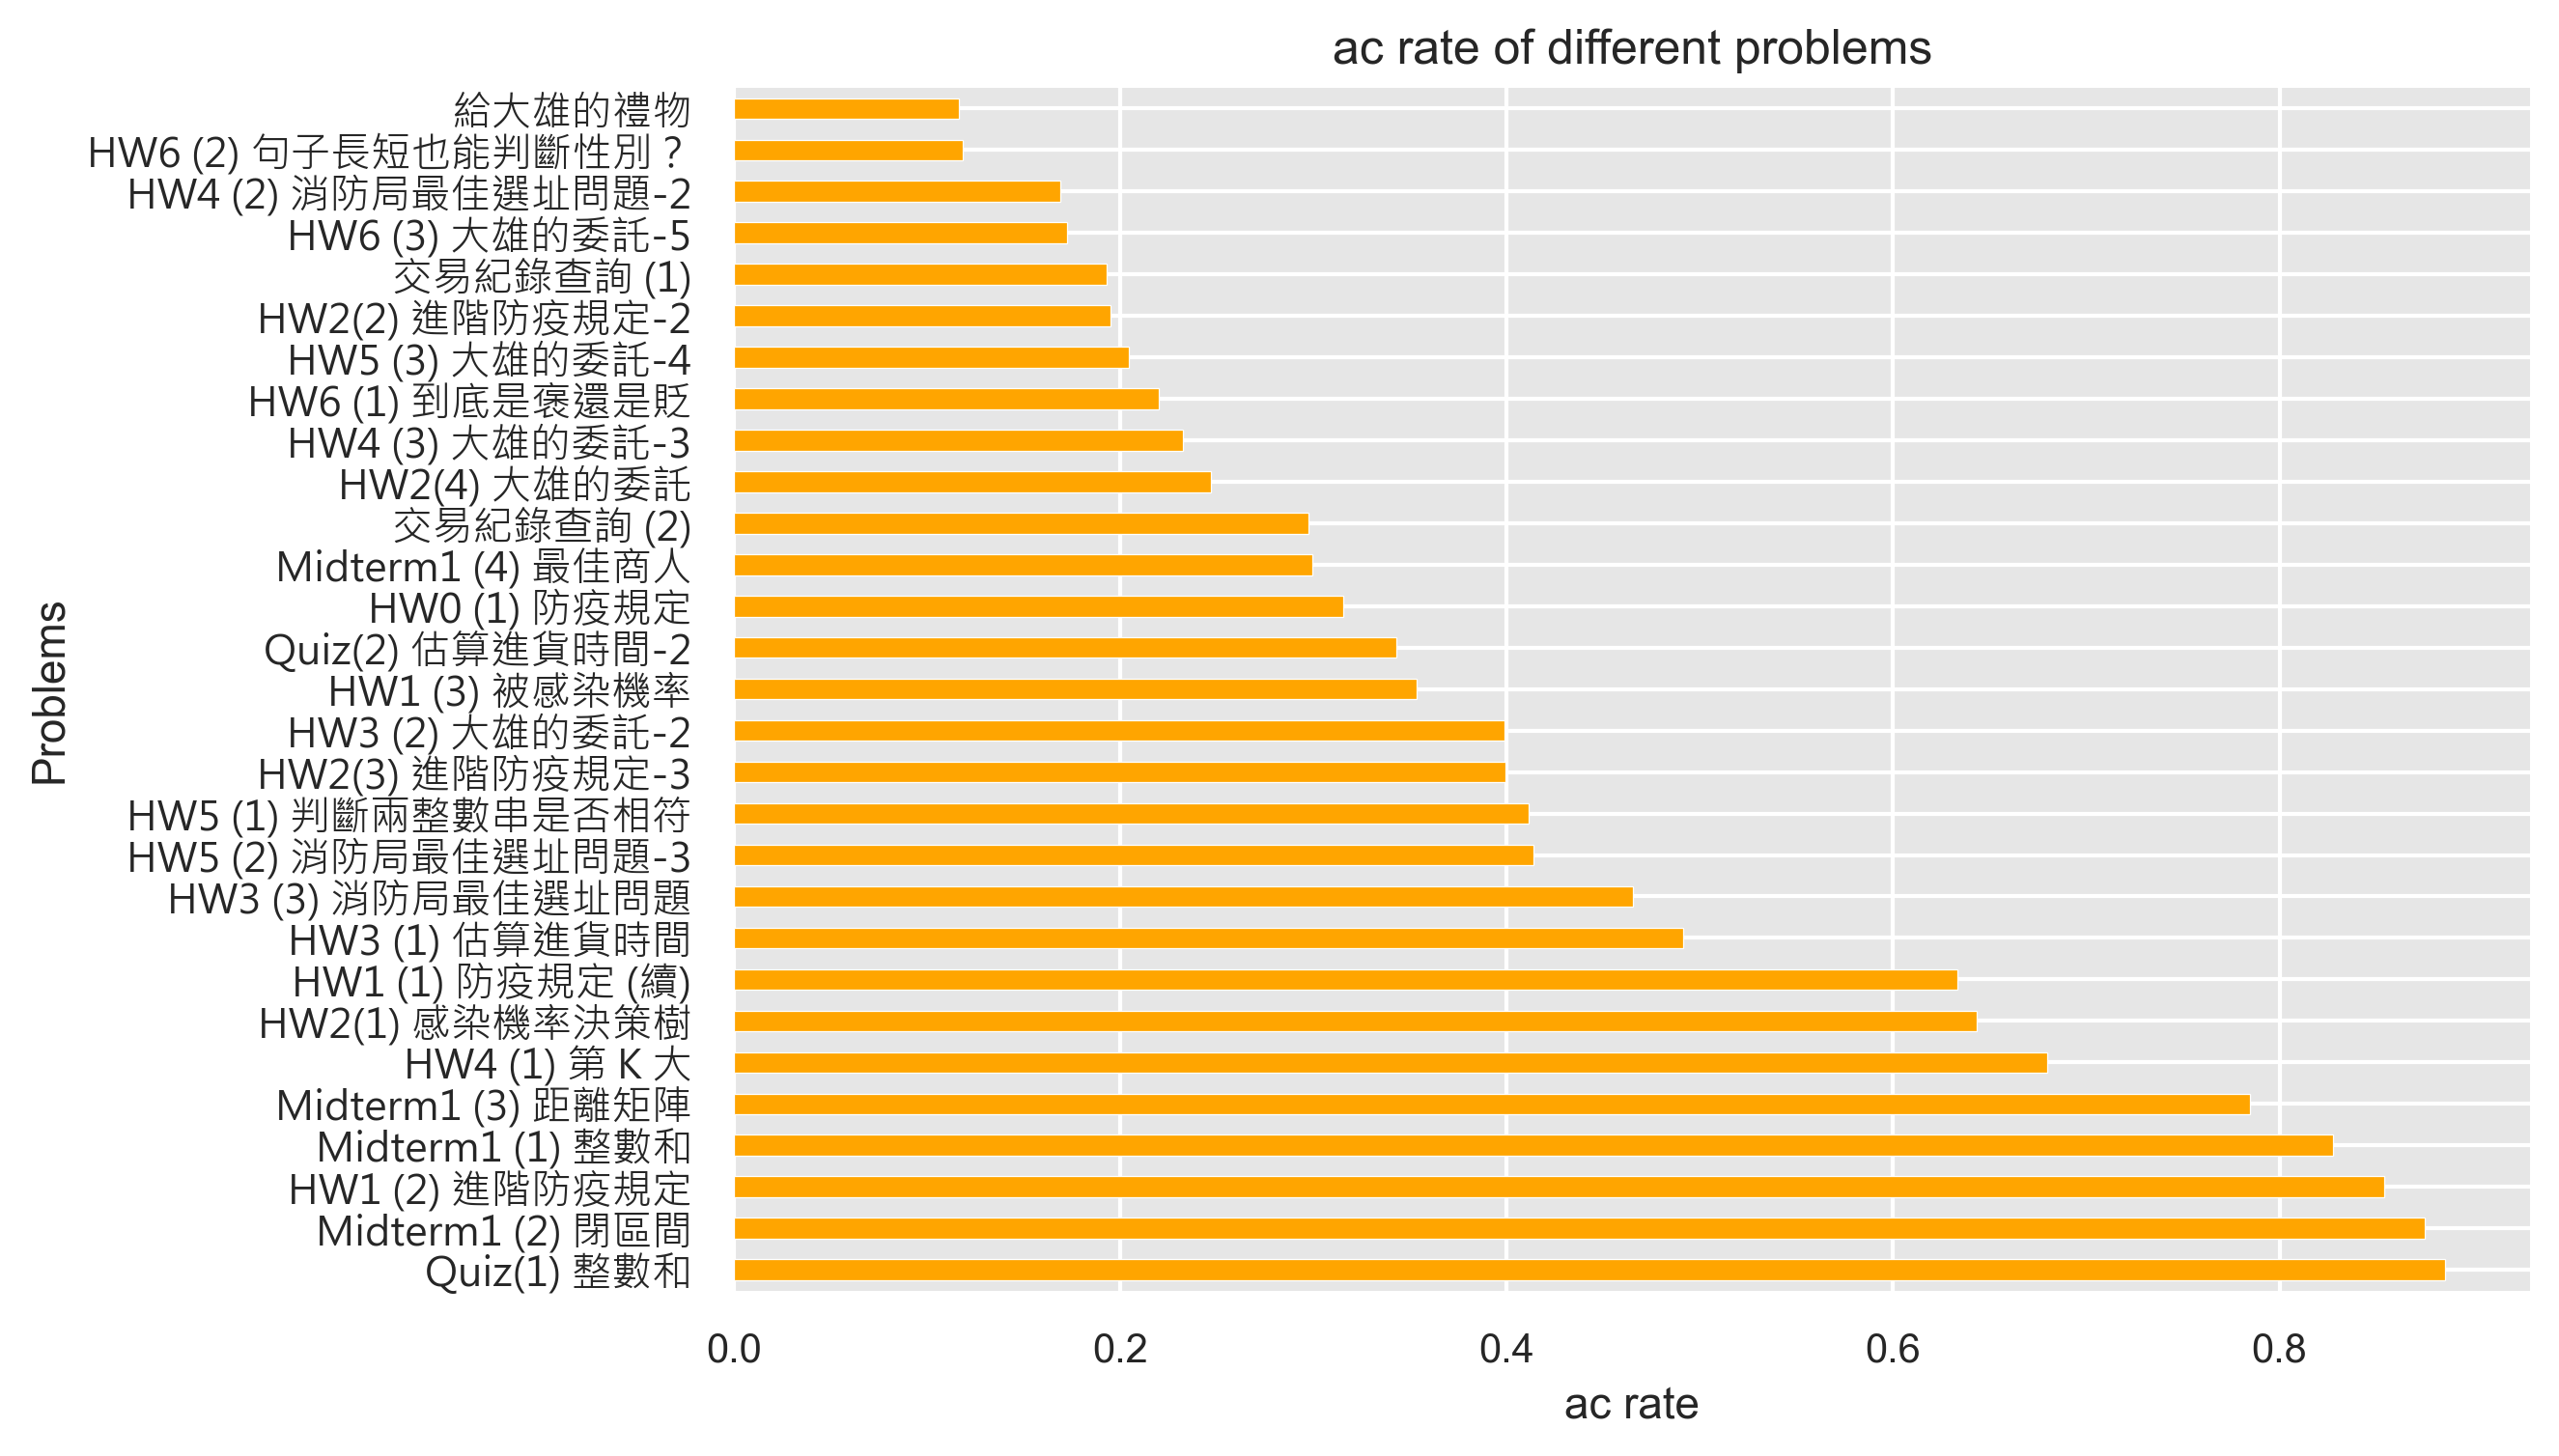

In [184]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(8,6))
fig, ax = plt.subplots()
eee['ac rate'].plot(kind='barh',color='orange')
plt.xlabel('ac rate')
plt.ylabel("Problems")
plt.title('ac rate of different problems')
ax.set_yticklabels(eee.index,fontproperties=prop)
plt.rcParams['savefig.dpi'] = 300 
plt.rcParams['figure.dpi'] = 300 
#plt.savefig('1.png',dpi=900,bbox_inches='tight')  #存檔
plt.show()

<Figure size 3600x3000 with 0 Axes>

Text(0.5, 0, 'total handin quantities')

Text(0, 0.5, 'Problems')

Text(0.5, 1.0, 'total handin quantities of different problems')

[Text(0, 0, 'Quiz(1) 整數和'),
 Text(0, 0, 'Midterm1 (2) 閉區間'),
 Text(0, 0, 'HW1 (2) 進階防疫規定'),
 Text(0, 0, 'Midterm1 (1) 整數和'),
 Text(0, 0, 'Midterm1 (3) 距離矩陣'),
 Text(0, 0, 'HW4 (1) 第 K 大'),
 Text(0, 0, 'HW2(1) 感染機率決策樹'),
 Text(0, 0, 'HW1 (1) 防疫規定 (續)'),
 Text(0, 0, 'HW3 (1) 估算進貨時間'),
 Text(0, 0, 'HW3 (3) 消防局最佳選址問題'),
 Text(0, 0, 'HW5 (2) 消防局最佳選址問題-3'),
 Text(0, 0, 'HW5 (1) 判斷兩整數串是否相符'),
 Text(0, 0, 'HW2(3) 進階防疫規定-3'),
 Text(0, 0, 'HW3 (2) 大雄的委託-2'),
 Text(0, 0, 'HW1 (3) 被感染機率'),
 Text(0, 0, 'Quiz(2) 估算進貨時間-2'),
 Text(0, 0, 'HW0 (1) 防疫規定'),
 Text(0, 0, 'Midterm1 (4) 最佳商人'),
 Text(0, 0, '交易紀錄查詢 (2)'),
 Text(0, 0, 'HW2(4) 大雄的委託'),
 Text(0, 0, 'HW4 (3) 大雄的委託-3'),
 Text(0, 0, 'HW6 (1) 到底是褒還是貶'),
 Text(0, 0, 'HW5 (3) 大雄的委託-4'),
 Text(0, 0, 'HW2(2) 進階防疫規定-2'),
 Text(0, 0, '交易紀錄查詢 (1)'),
 Text(0, 0, 'HW6 (3) 大雄的委託-5'),
 Text(0, 0, 'HW4 (2) 消防局最佳選址問題-2'),
 Text(0, 0, 'HW6 (2) 句子長短也能判斷性別？'),
 Text(0, 0, '給大雄的禮物')]

<Figure size 3600x3000 with 0 Axes>

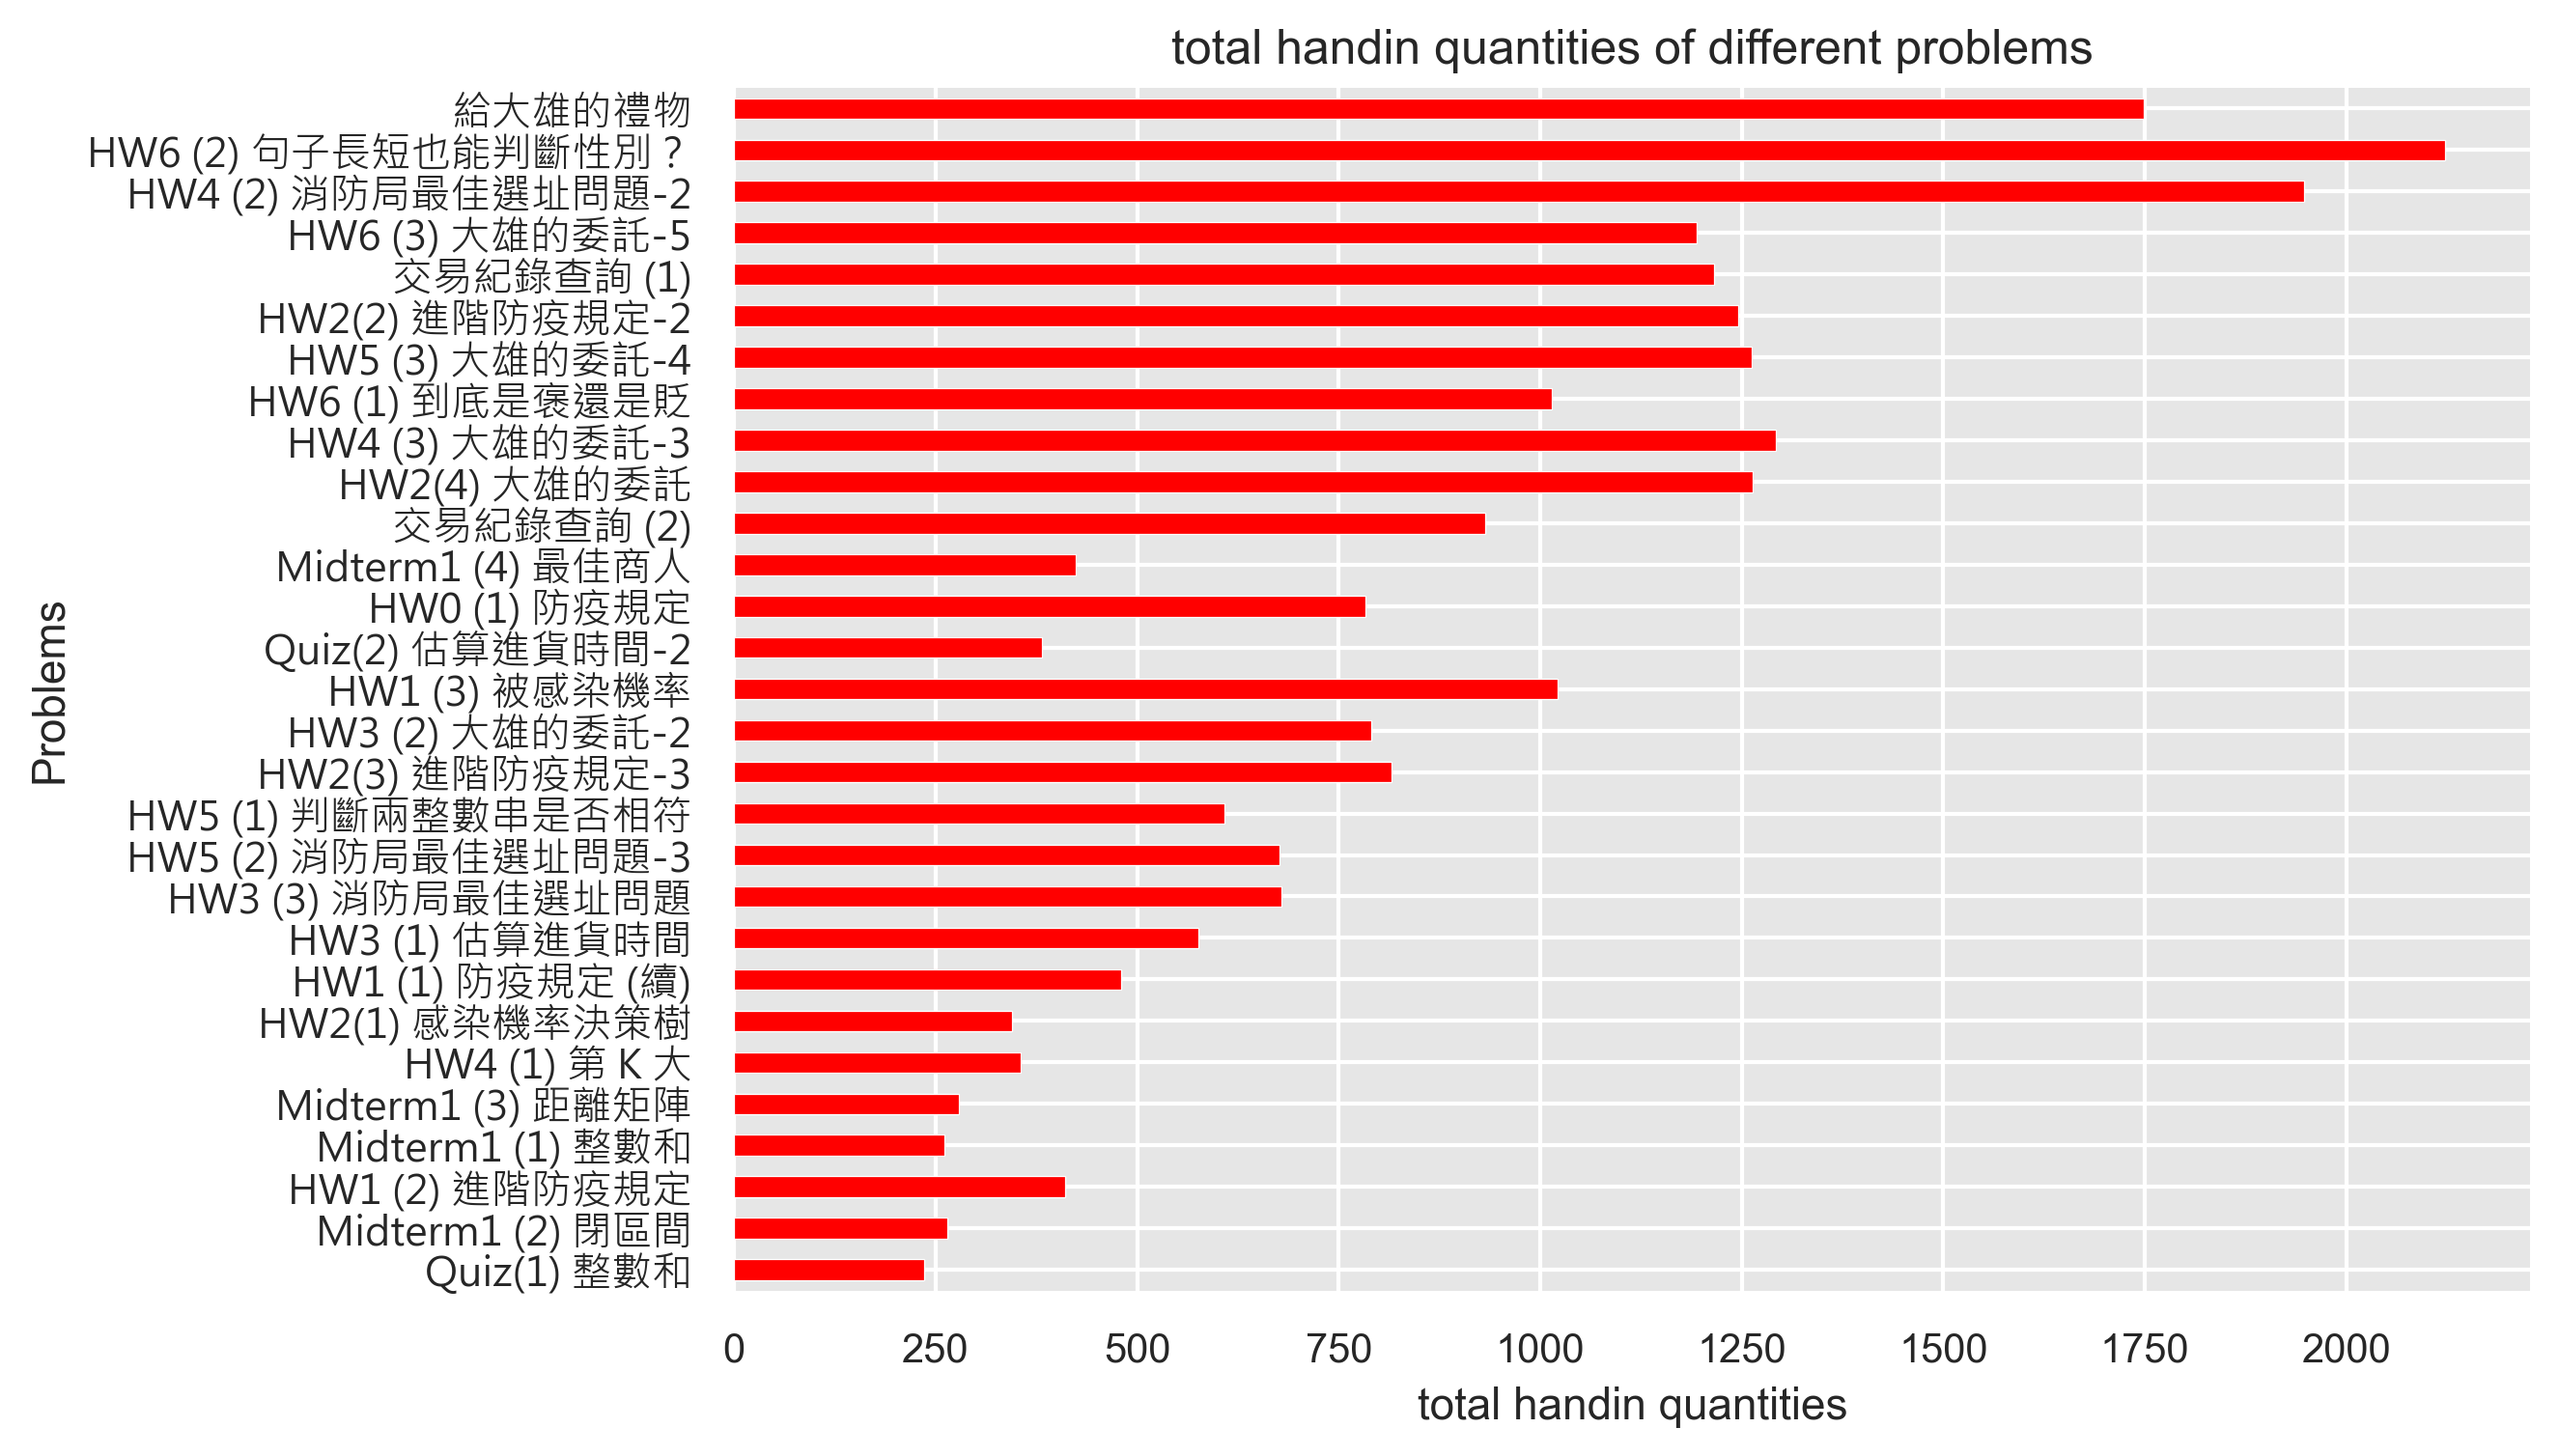

In [185]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(12,10))
fig, ax = plt.subplots()
eee["total handin count"].plot(kind='barh',color='red')
plt.xlabel('total handin quantities')
plt.ylabel("Problems")
plt.title('total handin quantities of different problems')
ax.set_yticklabels(eee.index,fontproperties=prop)
plt.rcParams['savefig.dpi'] = 300 
plt.rcParams['figure.dpi'] = 300 
#plt.savefig('2.png',dpi=900,bbox_inches='tight')  #存檔
plt.show()

In [38]:
#Q3 時間與寫作業情形 是否要根據學校考試時間進行作業調整  （考慮分群
# 4/20 ~ 4/24

In [47]:
q1=data.groupby(['submit_time_date'])['score'].mean()

In [48]:
q2=data.groupby(['submit_time_date'])['status_value'].mean()

In [49]:
q3=data.groupby(['submit_time_date'])['status_value'].count()

In [50]:
q=pd.DataFrame({'score':q1,"ac rate":q2,"total handin count":q3})

In [196]:
q.head(20)

,score,ac rate,total handin count
submit_time_date,,,
2020-03-02,5.882353,0.294118,51
2020-03-03,7.650794,0.380952,126
2020-03-04,4.491228,0.219298,114
2020-03-05,6.548673,0.327434,113
2020-03-06,5.974026,0.285714,77
2020-03-07,6.117647,0.305882,85
2020-03-08,8.539326,0.426966,89
2020-03-09,11.100478,0.449761,209
2020-03-10,22.298592,0.630986,355


<Figure size 3600x3000 with 0 Axes>

Text(0.5, 0, 'submit date')

Text(0, 0.5, 'ac rate')

Text(0.5, 1.0, 'ac rate time trend')

Text(2020-04-19, 0.2, '| 期中考週 |')

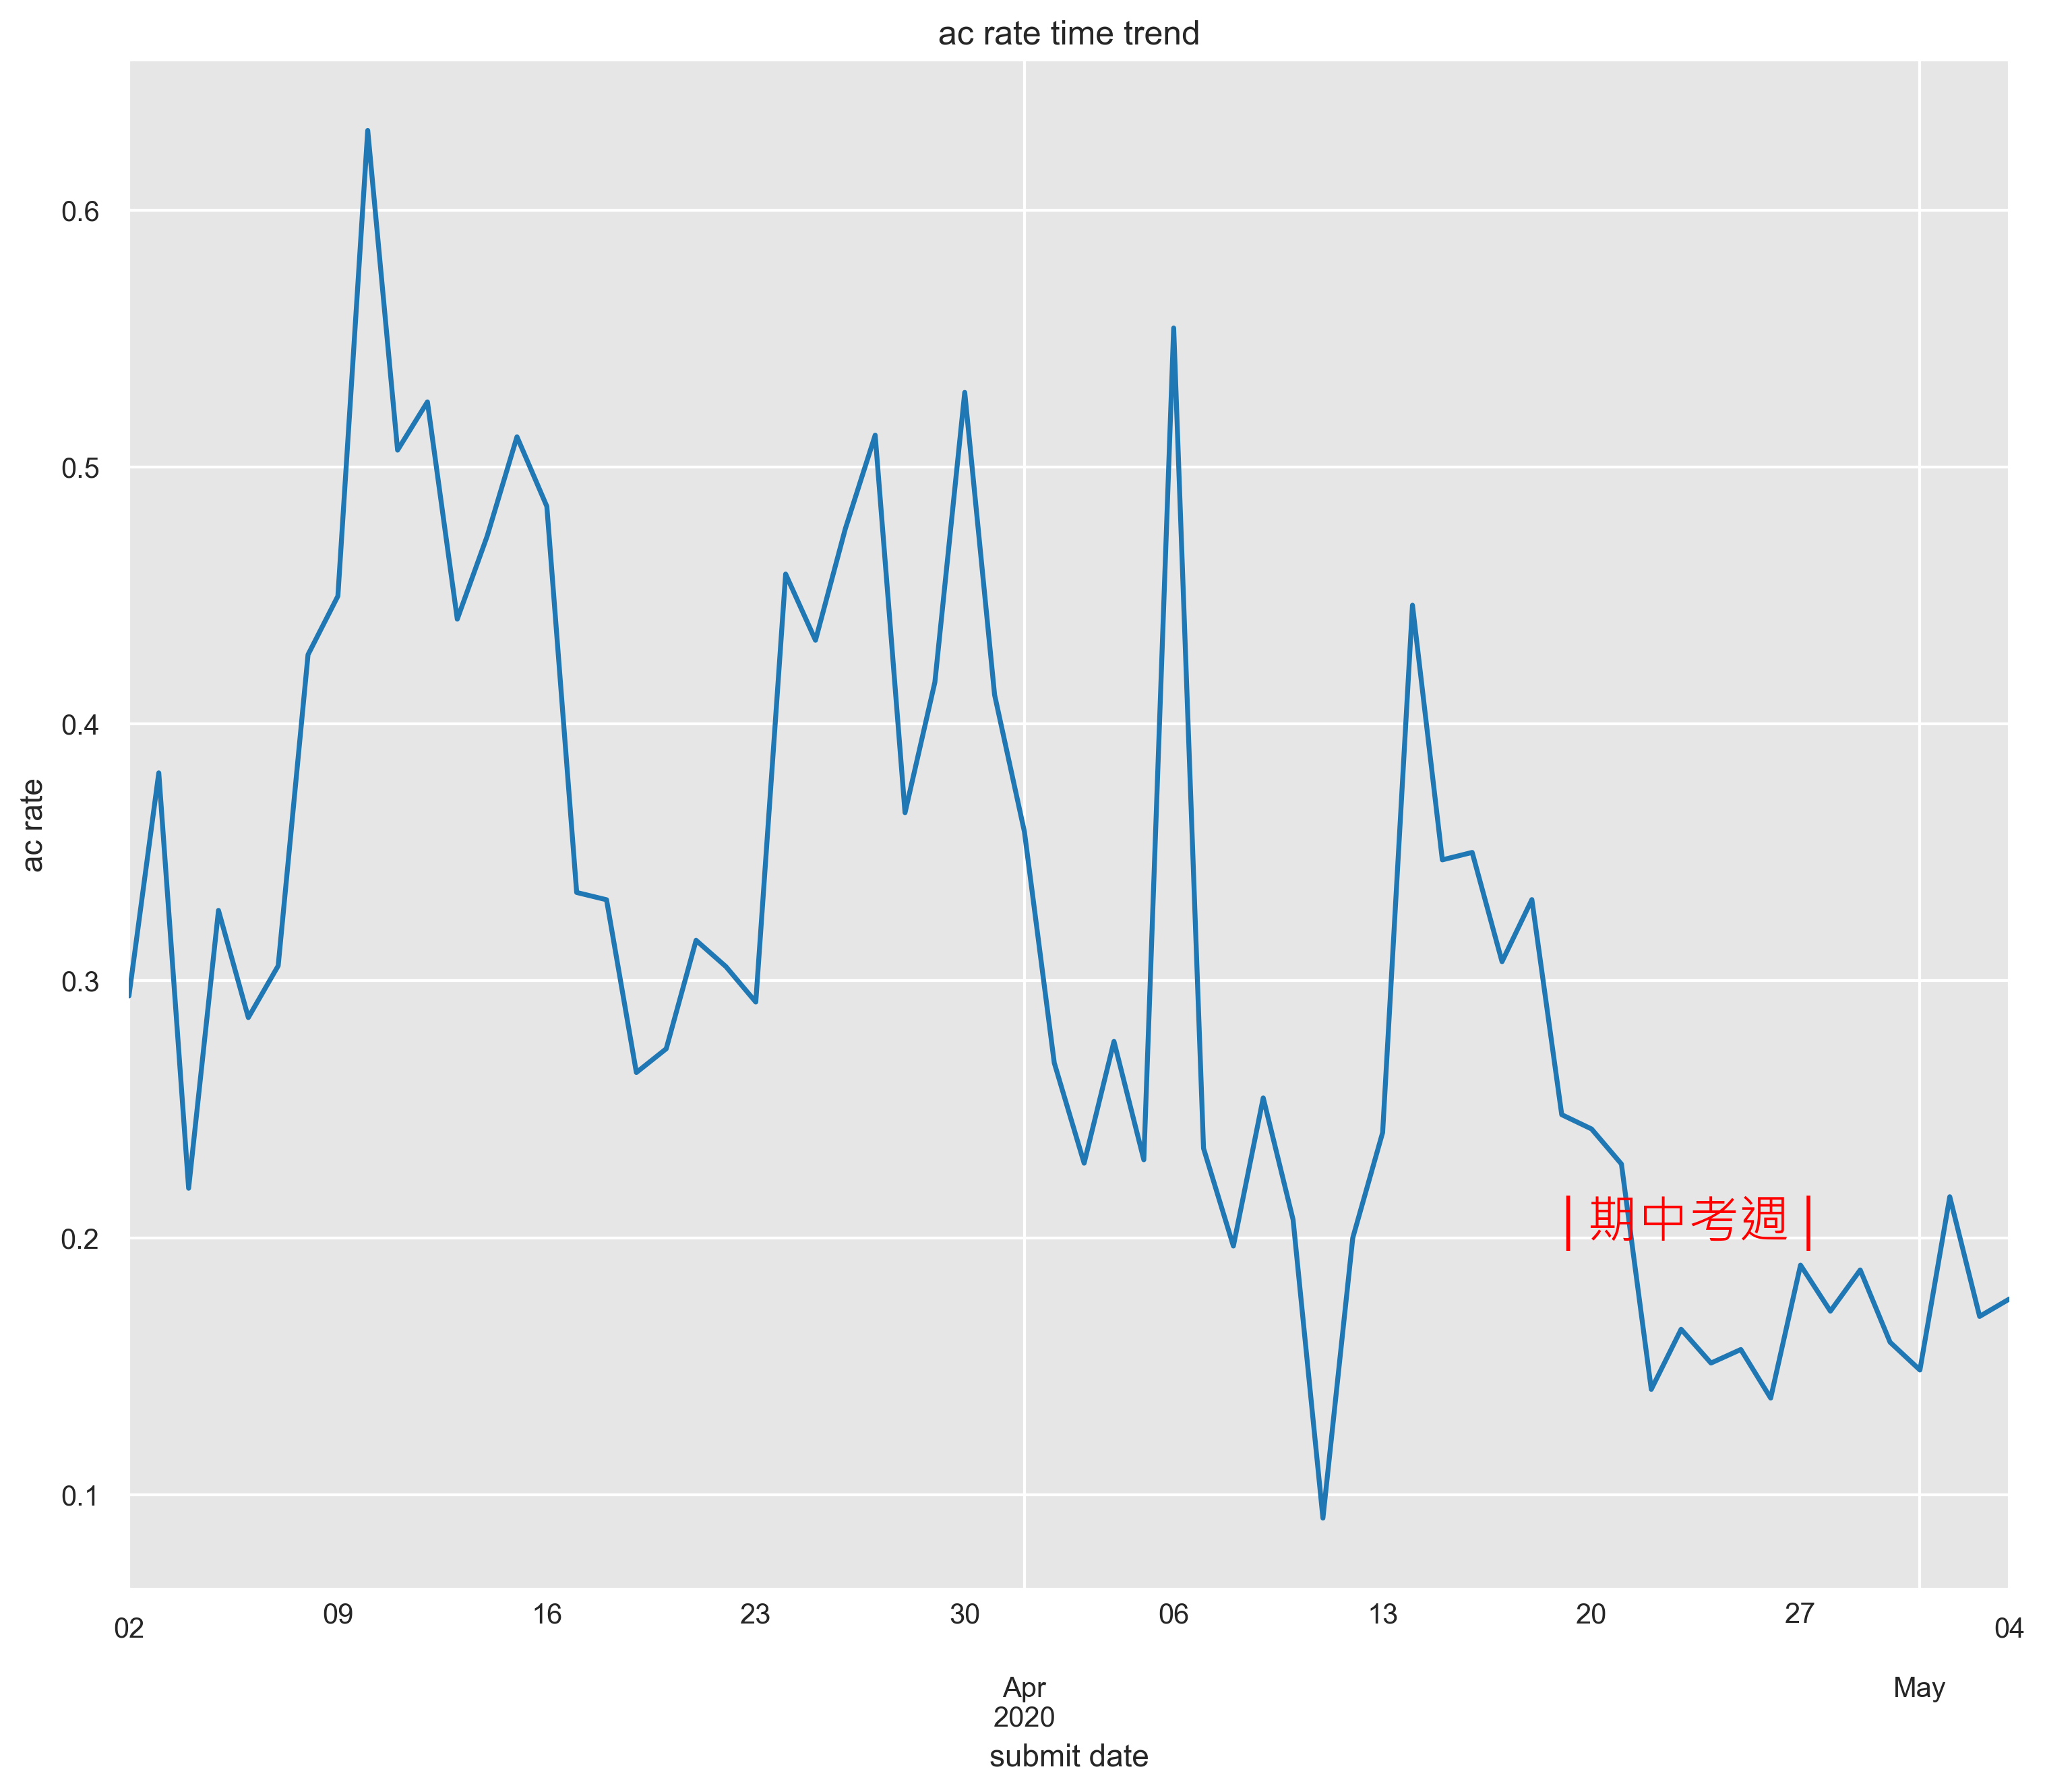

In [188]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(12,10))
q["ac rate"].plot()
plt.xlabel('submit date')
plt.ylabel("ac rate")
plt.title('ac rate time trend')
plt.text('2020-04-19', 0.2, "| 期中考週 |",fontproperties=prop,fontsize=18,c='r')
plt.rcParams['savefig.dpi'] = 300 
plt.rcParams['figure.dpi'] = 300 
#plt.savefig('5.png',dpi=900,bbox_inches='tight')  #存檔
plt.show()

<Figure size 3600x3000 with 0 Axes>

Text(0.5, 0, 'submit date')

Text(0, 0.5, 'hand in total quantities')

Text(0.5, 1.0, 'hand in total quantities time trend')

Text(2020-04-19, 600, '| 期中考週 |')

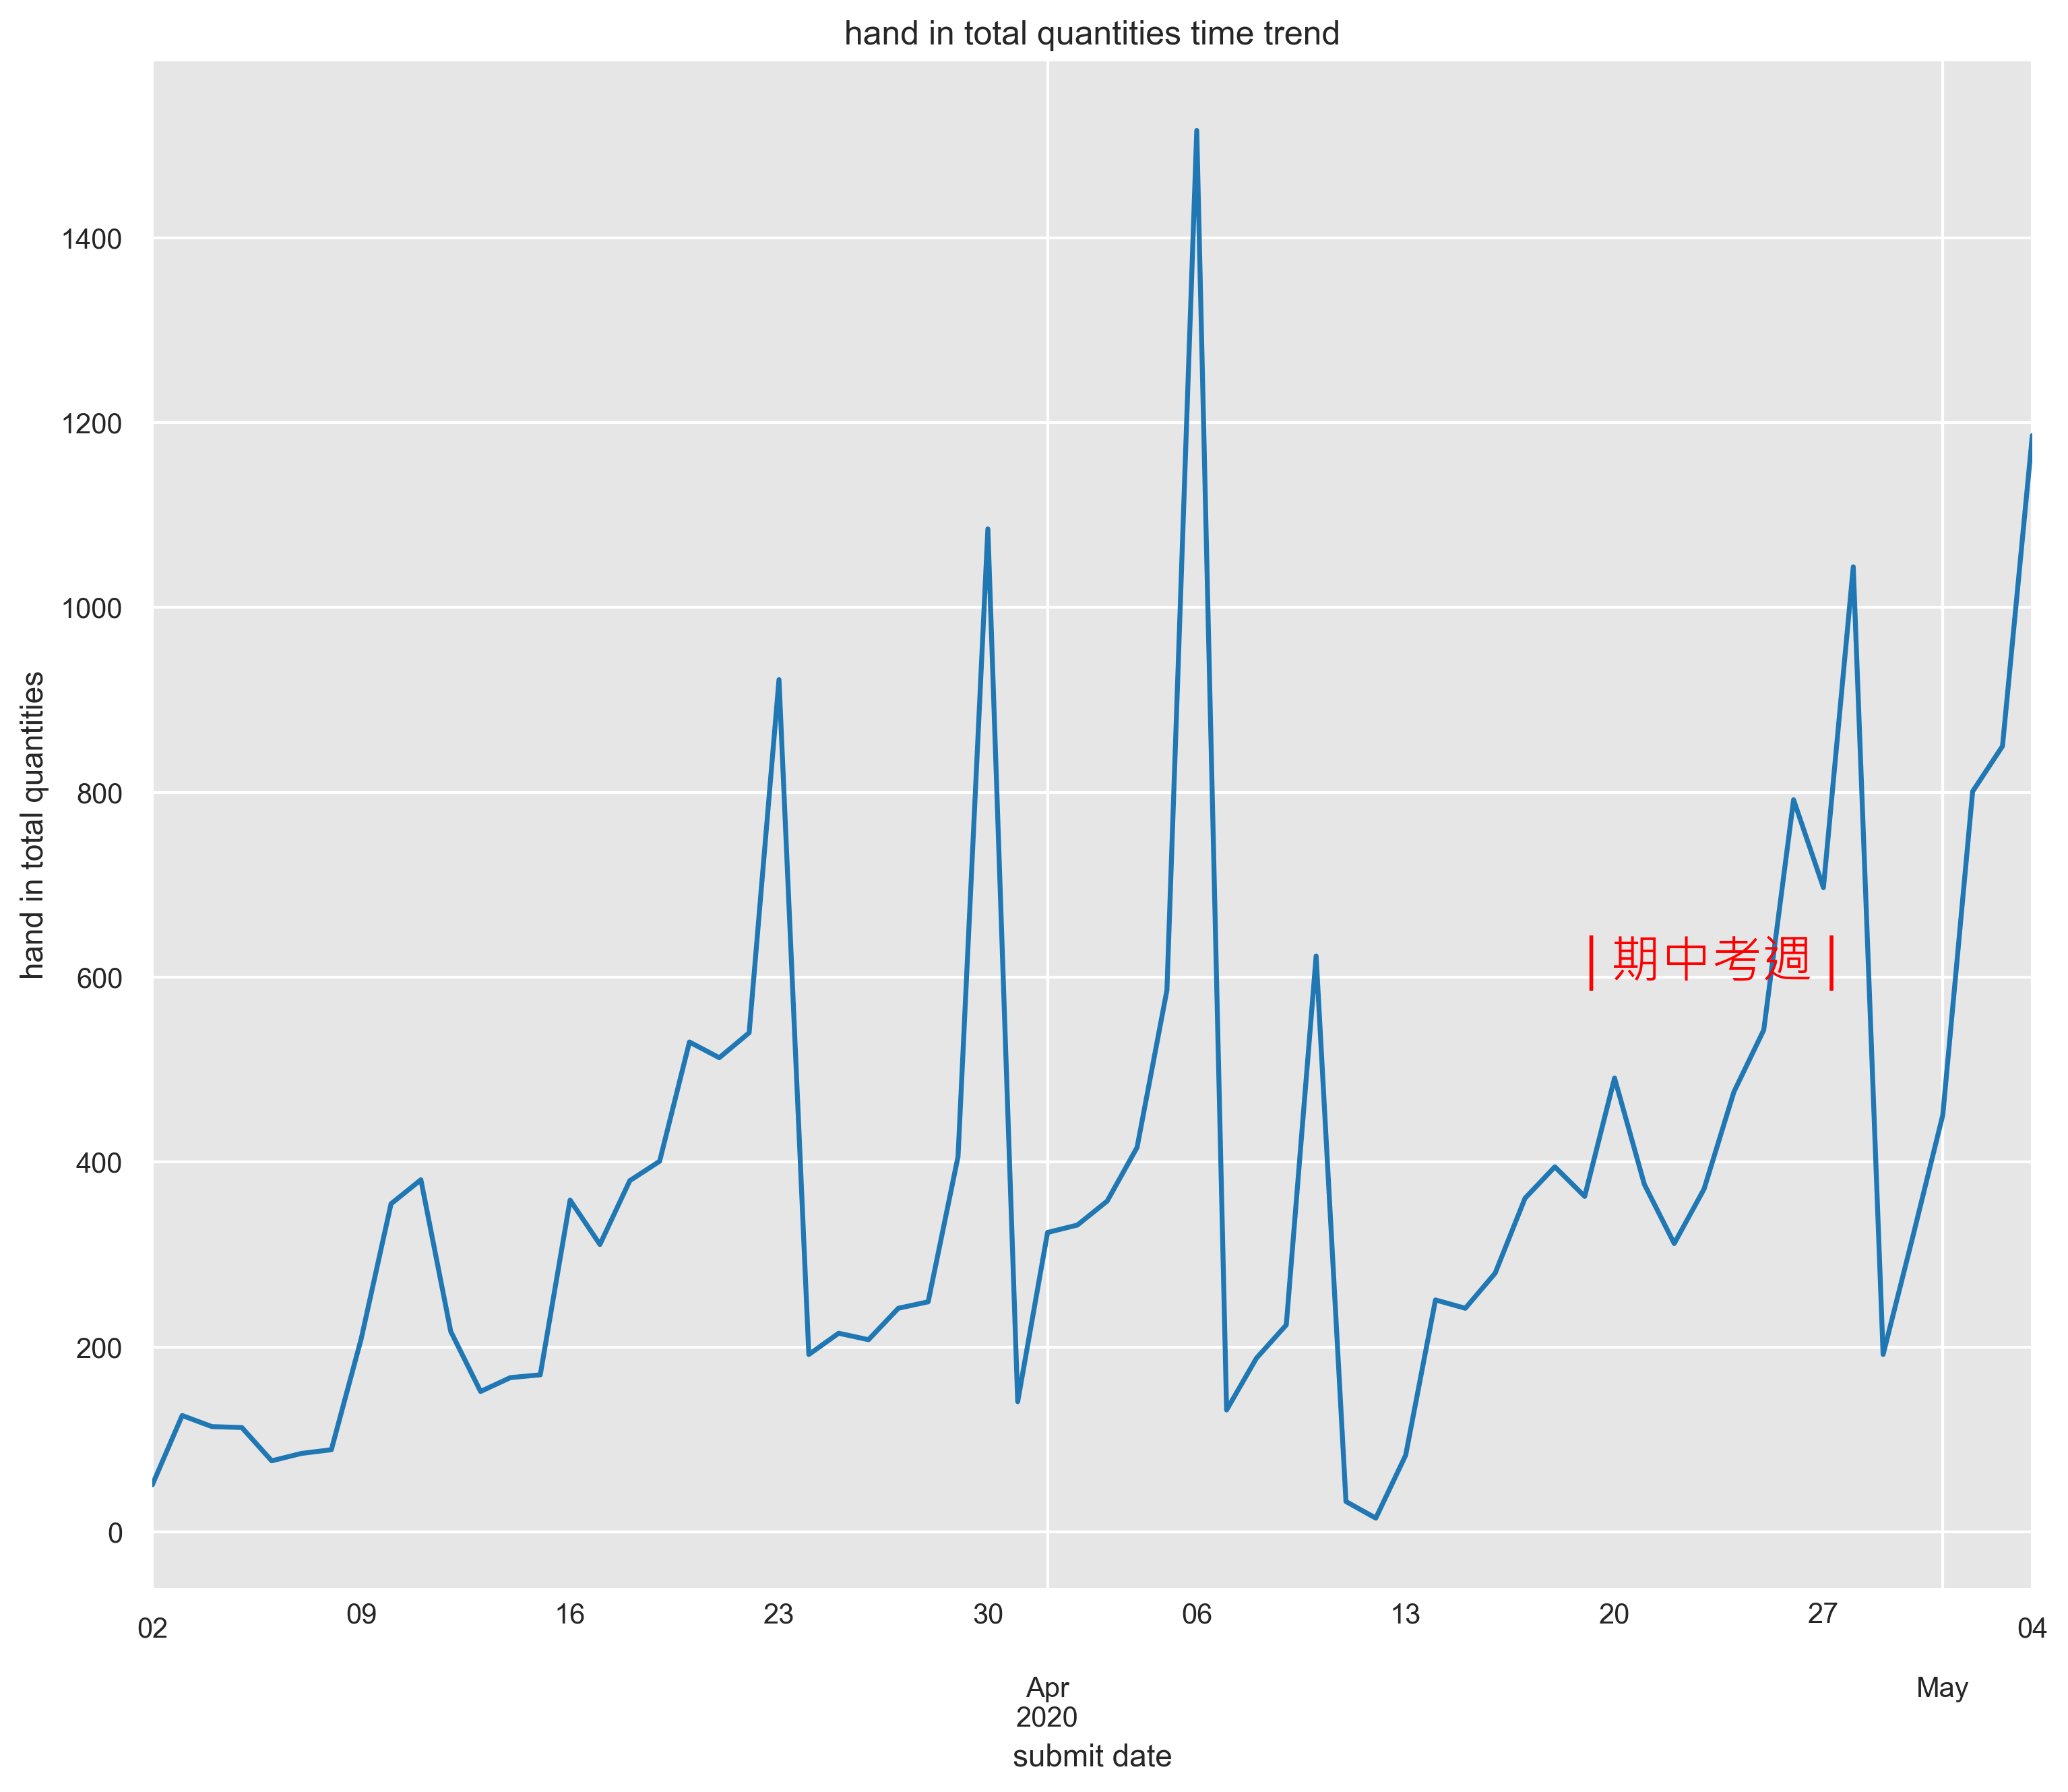

In [189]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(12,10))
q["total handin count"].plot()
plt.xlabel('submit date')
plt.ylabel("hand in total quantities")
plt.title('hand in total quantities time trend')
plt.text('2020-04-19', 600, "| 期中考週 |",fontproperties=prop,fontsize=18,c='r')
plt.rcParams['savefig.dpi'] = 300 
plt.rcParams['figure.dpi'] = 300 
#plt.savefig('6.png',dpi=900,bbox_inches='tight')  #存檔
plt.show()